In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

inputdir <- "./load_files/"
outputdir <- "./report/"


exn <- readRDS(file = "./load_files/ExN_data_08312022.rds")

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




`summarise()` has grouped output by 'subtype', 'lobe'. You can override using the `.groups` argument.



png 
  2

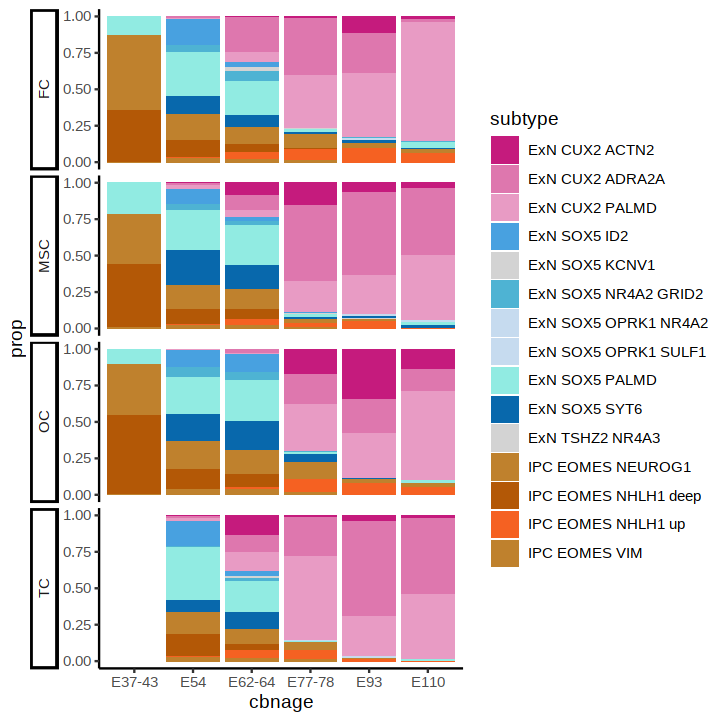

In [2]:
## Cell type props in each region
cls_cols <- setNames(c("#bf812d", "#bf812d", 
                    "#f56122", "#e89bc4", "#de77ae", "#c51b7d", 
                       "#D3D3D3", "#D3D3D3",
                    "#b35806", "#91ebe2", "#48a1e0", 
                       "#0868ac", "#c6dbef", "#c6dbef", "#4eb3d3"),
                    c("IPC EOMES VIM", "IPC EOMES NEUROG1", 
                    "IPC EOMES NHLH1 up", "ExN CUX2 PALMD", "ExN CUX2 ADRA2A", "ExN CUX2 ACTN2", 
                      "ExN TSHZ2 NR4A3", "ExN SOX5 KCNV1",
                    "IPC EOMES NHLH1 deep", "ExN SOX5 PALMD", "ExN SOX5 ID2", 
                      "ExN SOX5 SYT6", "ExN SOX5 OPRK1 SULF1","ExN SOX5 OPRK1 NR4A2", "ExN SOX5 NR4A2 GRID2"))


pdata <- exn@meta.data %>%
            mutate(cbnage = gsub("^E37$", "E37-43", cbnage)) %>%
            mutate(cbnage = gsub("^E42-43$", "E37-43", cbnage)) %>%
            group_by(subtype, lobe, cbnage) %>%
            summarize(ncells = n()) %>%
            ungroup() %>%
            group_by(lobe, cbnage) %>%
            mutate(prop = ncells * 100/sum(ncells)) %>%
            filter(! lobe %in% "Insula") %>%
            mutate(cbnage = factor(cbnage, levels = c("E37-43", "E54", "E62-64", "E77-78", "E93", "E110"))) %>%
            mutate(lobe = factor(lobe, levels = c("FC", "MSC", "OC", "TC")))

p <- ggplot(pdata, aes(x = cbnage, y = prop, fill = subtype)) +
            geom_bar(position = "fill", stat = "identity") +
            theme_classic() +
            scale_fill_manual(values = cls_cols) +
            facet_wrap(vars(lobe), nrow = 4, ncol = 1, strip.position = 'left') +
            theme(legend.position = "right", strip.placement = 'outside', 
                  strip.text = element_text(size = rel(0.8), angle = 90), 
                  panel.spacing = unit(0.05, "in"))
options(repr.plot.width=6, repr.plot.height=6)
p
pdf(paste0(outputdir, "AgeInte-Proption.region-age.pdf"), width = 6, height = 6)
print(p)
dev.off()

png 
  2

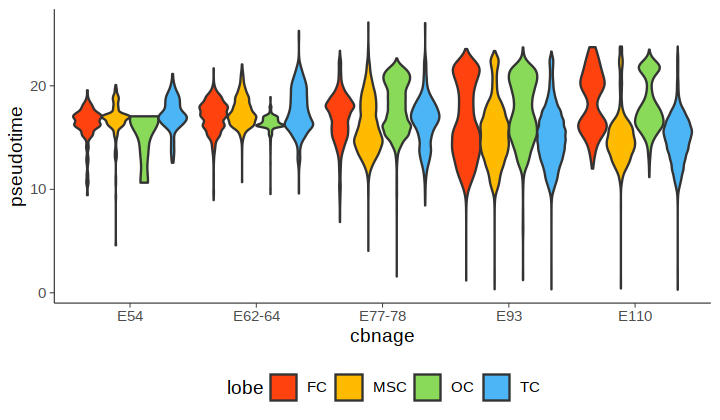

In [3]:
## Plot pseudotime distribution for upper layer neurons
load(file = paste0("../region_differences/load_files/intermediate/", 
                   "IE_curve_harmony_IT_ptime.Rdata")) ##it_ptime, it_cycle

sh_cells <- intersect(rownames(it_ptime), colnames(exn))
sh_meta <- exn@meta.data[sh_cells, c("cbnage", "subtype", "lobe")] %>%
            mutate(pseudotime = it_ptime[sh_cells, "IT"]) %>%
            filter(subtype %in% c("ExN CUX2 ACTN2", "ExN CUX2 ADRA2A")) %>%
            mutate(cbnage = factor(cbnage, levels = c("E54", "E62-64", "E77-78", "E93", "E110"))) %>%
            filter(! lobe %in% "Insula") %>%
            mutate(lobe = factor(lobe, levels = c("FC", "MSC", "OC", "TC")))

reg_cols <- c("#FF420E", "#FFBB00", "#4CB5F5", "#89DA59", "#878787", "#B037C4") %>% 
                setNames(., c("FC", "MSC", "TC", "OC", "Insula", "GE"))
p2 <- ggplot(sh_meta, aes(x = cbnage, y = pseudotime, fill = lobe)) +
            geom_violin(trim = TRUE, scale = "width") +
            theme_classic() +
            scale_fill_manual(values = reg_cols)+
            theme(legend.position = "bottom", 
                  axis.line = element_line(size = 0.2), 
                  axis.ticks = element_line(size = 0.2))

options(repr.plot.width=6, repr.plot.height=3.5)
p2
pdf(paste0(outputdir, "AgeInte-Pseudotime-upper.distribution_v2.pdf"), width = 6, height = 3.5)
print(p2)
dev.off() 

In [4]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/Tools/Anaconda3/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.3.0 dplyr_1.0.7   Seurat_3.1.5 

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.6         
 [7] sctransform_0.2.1   tools_3.6.1     